In [1]:
from seirsplus.models import *
import networkx

In [2]:
help(custom_exponential_graph)

Help on function custom_exponential_graph in module seirsplus.models:

custom_exponential_graph(base_graph=None, scale=100, min_num_edges=0, m=9, n=None)
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # Define a custom method for generating 
    # power-law-like graphs with exponential tails 
    # both above and below the degree mean and  
    # where the mean degree be easily down-shifted
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



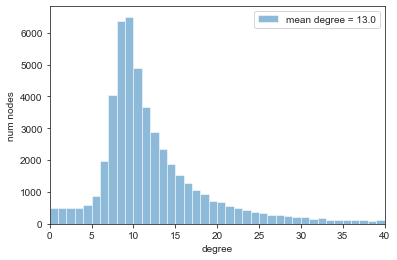

In [5]:
numNodes = 50000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=40)

In [7]:
from netwulf import visualize
visualize(baseGraph)

(None, None)

t = 0.26
t = 10.36
[Checkpoint: Updating parameters]
t = 20.14
t = 30.02
t = 40.03
t = 50.02
t = 60.02
t = 70.01
t = 80.01
t = 90.00
[Checkpoint: Updating parameters]
t = 100.00
t = 110.00
t = 120.01
t = 130.01
t = 140.00
t = 150.00
t = 160.01
t = 170.00
t = 180.04
t = 190.00
t = 200.02
t = 210.05
t = 220.01
t = 230.00
t = 240.43
t = 250.06
t = 260.13
t = 270.18
t = 280.92


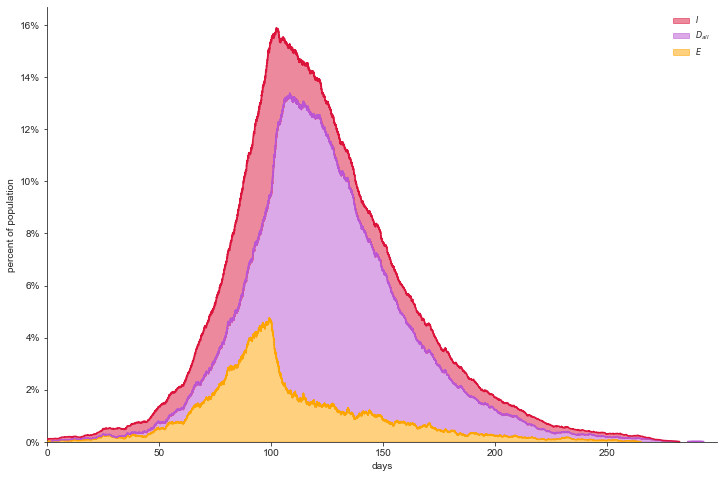

In [8]:
from seirsplus.models import *
import networkx

numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
G_normal     = custom_exponential_graph(baseGraph, scale=100)
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0.02, theta_I=0.02, phi_E=0.2, phi_I=0.2, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=10)

checkpoints = {'t': [20, 100], 'G': [G_distancing, G_normal], 'p': [0.1, 0.5], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02], 'phi_E':   [0.2, 0.2], 'phi_I':   [0.2, 0.2]}

model.run(T=300, checkpoints=checkpoints)

model.figure_infections()

In [ ]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)

In [ ]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
plot_degree_distn(G_quarantine, max_degree=40)

In [ ]:
# Quarantine interactions:
G_quarantine_iso = custom_exponential_graph(baseGraph, scale=3)
plot_degree_distn(G_quarantine_iso, max_degree=40)

In [ ]:
model = SEIRSNetworkModel(G       =G_normal, 
                          beta    =0.155, 
                          sigma   =1/5.2, 
                          gamma   =1/12.39, 
                          mu_I    =0.0004,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p       =0.5,
                          Q       =G_quarantine, 
                          beta_D  =0.155, 
                          sigma_D =1/5.2, 
                          gamma_D =1/12.39, 
                          mu_D    =0.0004,
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, 
                          phi_I   =0, 
                          psi_E   =1.0, 
                          psi_I   =1.0,
                          q       =0.5,
                          initI   =numNodes/100, 
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, )

In [ ]:
checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.1, 0.5], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}

In [ ]:
model.run(T=300, checkpoints=checkpoints)


In [ ]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.15)


In [ ]:
ref_model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=numNodes/100)
ref_model.run(T=300)

In [ ]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)


In [ ]:
ref_model_determ = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=100, initN=10000) 
ref_model_determ.run(T=300)

In [ ]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')